In [192]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

In [193]:
x_train = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
y_train = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

In [194]:
class XorOpertorNN:
	def __init__(self):
		self.W1 = torch.randn((2,2), requires_grad=True, dtype=torch.float)
		self.b1 = torch.randn((1,2), requires_grad=True, dtype=torch.float)
		self.W2 = torch.randn((2,1), requires_grad=True, dtype=torch.float)
		self.b2 = torch.randn((1,1), requires_grad=True, dtype=torch.float)
	
	def parameters(self):
		return [self.W1, self.b1, self.W2, self.b2]

	def f1(self, x):
		return torch.sigmoid(x @ self.W1 + self.b1)
	
	def f2(self, x):
		return torch.sigmoid(x @ self.W2 + self.b2)

	def f(self, x):
		return self.f2(self.f1(x))

	def logits(self, x):
		return x @ self.W2 + self.b2
	
	def loss(self, x ,y):
		return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(self.f1(x)), y)

In [195]:
model = XorOpertorNN()
optimizer = torch.optim.SGD(model.parameters(), lr=5)
print(f'W1 = {model.W1}, W2 = {model.W2}, b1 = {model.b1}, b2 = {model.b2}')
print()

W1 = tensor([[ 0.1979,  0.5306],
        [-1.7472,  0.6586]], requires_grad=True), W2 = tensor([[-0.6290],
        [-2.1157]], requires_grad=True), b1 = tensor([[-0.0085,  0.6999]], requires_grad=True), b2 = tensor([[0.1366]], requires_grad=True)



In [196]:
for epoch in range(10000):
	model.loss(x_train, y_train).backward()
	optimizer.step()
	optimizer.zero_grad()

In [197]:
print(f'W1 = {model.W1}, W2 = {model.W2}, b1 = {model.b1}, b2 = {model.b2}, loss = {model.loss(x_train, y_train)}')

W1 = tensor([[-8.4200,  7.0335],
        [-8.4220,  7.0338]], requires_grad=True), W2 = tensor([[-18.2469],
        [-18.4246]], requires_grad=True), b1 = tensor([[  3.6163, -10.8292]], requires_grad=True), b2 = tensor([[9.0465]], requires_grad=True), loss = 0.00018547226500231773


torch.Size([100, 100])
torch.Size([100, 100])


ValueError: shape mismatch: objects cannot be broadcast to a single shape

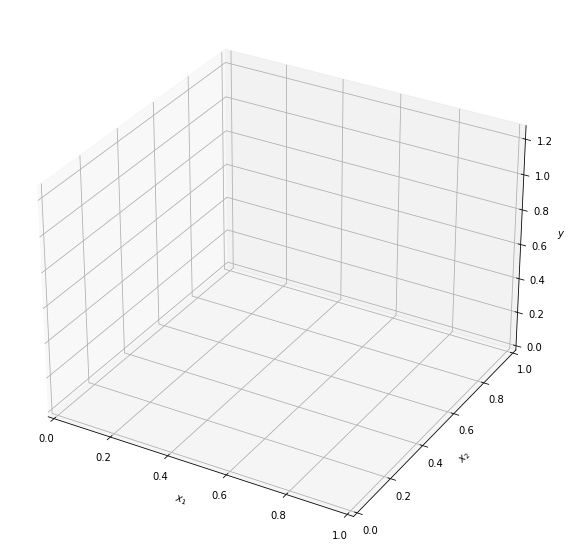

In [207]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")
ax.set_zlim(0, 1.25)

x1, x2 = torch.meshgrid(torch.linspace(0, 1.25, 100), torch.linspace(0, 1.25, 100))

# print(x1)
# print(x2)
y_grid = torch.empty([100,100])

for i in range(100):
	for j in range(100):
		x = torch.tensor([[x1[i,j], x2[i,j]]])
		y_grid[i,j] = model.f(x).item()

ax.plot_wireframe(x1,x2,y_grid, color='red')

plt.show()
